# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from imblearn.combine import SMOTEENN

# Load Dataset

In [3]:
pwd = os.getcwd()
pwd

'C:\\Users\\pc\\Desktop\\AF py\\Kaggle practice'

In [19]:
df = pd.read_csv(pwd+'\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Wrangling and Preprocessing

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [16]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
df[pd.isnull(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [28]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [29]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [181]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [32]:
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [34]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [36]:
df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [37]:
df['MultipleLines'].replace({'No phone service':'No'}, inplace=True)

In [38]:
cols_to_replace = ['OnlineSecurity', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [39]:
for col in cols_to_replace:
    df[col].replace({'No internet service': 'No'}, inplace = True)

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
to_binary = ['Partner','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','Dependents','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn'] 

for i in to_binary:
    df[i].replace({'Yes':1,'No':0},inplace=True)

In [42]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [44]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [45]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [46]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [47]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [48]:
dummy_cols = ['gender','InternetService','Contract','PaymentMethod']

In [51]:
dummy_df = pd.get_dummies(df[dummy_cols]) 

In [52]:
dummy_df.head()

,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,0,0,0,0,1,0
1,0,1,1,0,0,0,1,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,0,0,1
3,0,1,1,0,0,0,1,0,1,0,0,0
4,1,0,0,1,0,1,0,0,0,0,1,0


In [54]:
df[dummy_df.columns] = dummy_df

In [55]:
df.drop(columns=dummy_cols, inplace=True)

In [56]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   MultipleLines                            7032 non-null   int64  
 6   OnlineSecurity                           7032 non-null   int64  
 7   OnlineBackup                             7032 non-null   int64  
 8   DeviceProtection                         7032 non-null   int64  
 9   TechSupport                              7032 non-null   int64  
 10  StreamingTV                              7032 no

# Model Development and Evaluation

In [63]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
scaler = StandardScaler()

In [72]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [77]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_scaled,y_train)

LogisticRegression(solver='liblinear')

In [78]:
lr_predict = lr.predict(X_test_scaled)

In [79]:
LR_Accuracy_Score = accuracy_score(y_test,lr_predict)
LR_JaccardIndex = jaccard_score(y_test,lr_predict)
LR_F1_Score = f1_score(y_test,lr_predict)
LR_Log_Loss = log_loss(y_test,lr_predict)

In [80]:
print(f"Accuracy: {LR_Accuracy_Score}")
print(f"Jaccard Index: {LR_JaccardIndex}")
print(f"F1 Score: {LR_F1_Score}")
print(f"Log Loss: {LR_Log_Loss}")

Accuracy: 0.7882018479033405
Jaccard Index: 0.39307535641547864
F1 Score: 0.5643274853801169
Log Loss: 7.633979182627512


In [83]:
lr_report = classification_report(y_test,lr_predict)
print(lr_report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [84]:
lr_conf_matrix = confusion_matrix(y_test,lr_predict)
lr_conf_matrix

array([[916, 117],
       [181, 193]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

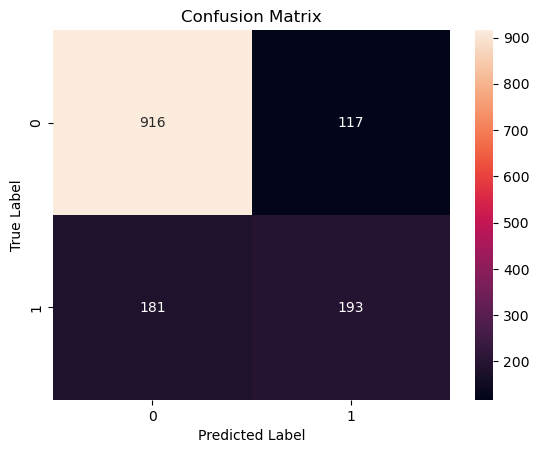

In [85]:
sns.heatmap(lr_conf_matrix,annot=True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [88]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01,0.1,1,10,100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 1000, 2500, 5000],
    'tol': [0.0001,0.001,0.01]
}

In [89]:
rs = RandomizedSearchCV(LogisticRegression(), param_distributions= param_grid, n_iter=10, cv = 5, random_state=42)
rs.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga'],
                                        'tol': [0.0001, 0.001, 0.01]},
                   random_state=42)

In [90]:
best_params = rs.best_params_
print(best_params)

{'tol': 0.01, 'solver': 'saga', 'penalty': 'l1', 'max_iter': 5000, 'C': 100}


In [91]:
accuracy = rs.score(X_test_scaled,y_test)
print(accuracy)

0.7896233120113717


In [92]:
lr_tuned = rs.best_estimator_

In [93]:
lr_predict_tuned = lr_tuned.predict(X_test_scaled)

In [95]:
lr_report_tuned = classification_report(y_test,lr_predict_tuned)
print(lr_report_tuned)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## Random Forest

In [96]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [97]:
rf_predict = rf.predict(X_test_scaled)

In [98]:
rf_Accuracy_Score = accuracy_score(y_test,rf_predict)
rf_JaccardIndex = jaccard_score(y_test,rf_predict)
rf_F1_Score = f1_score(y_test,rf_predict)
rf_Log_Loss = log_loss(y_test,rf_predict)

In [99]:
print(f"Accuracy: {rf_Accuracy_Score}")
print(f"Jaccard Index: {rf_JaccardIndex}")
print(f"F1 Score: {rf_F1_Score}")
print(f"Log Loss: {rf_Log_Loss}")

Accuracy: 0.7846481876332623
Jaccard Index: 0.3739669421487603
F1 Score: 0.544360902255639
Log Loss: 7.762066081664888


In [108]:
rf_report = classification_report(y_test,rf_predict)
print(rf_report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



In [100]:
param_grid = {
    'n_estimators': [50,100,200,300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto','sqrt','log2']
}

In [102]:
rs = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions= param_grid, n_iter=10, cv = 5, random_state=42)
rs.fit(X_train_scaled, y_train)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42)

In [103]:
best_params = rs.best_params_
print(best_params)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None}


In [104]:
accuracy = rs.score(X_test_scaled,y_test)
print(accuracy)

0.798862828713575


In [105]:
rf_tuned = rs.best_estimator_

In [106]:
rf_predict_tuned = rf_tuned.predict(X_test_scaled)

In [107]:
rf_report_tuned = classification_report(y_test,rf_predict_tuned)
print(rf_report_tuned)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.49      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



## Decision Tree

In [109]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [110]:
dt_predict = dt.predict(X_test_scaled)

In [111]:
dt_Accuracy_Score = accuracy_score(y_test,dt_predict)
dt_JaccardIndex = jaccard_score(y_test,dt_predict)
dt_F1_Score = f1_score(y_test,dt_predict)
dt_Log_Loss = log_loss(y_test,dt_predict)

In [112]:
print(f"Accuracy: {dt_Accuracy_Score}")
print(f"Jaccard Index: {dt_JaccardIndex}")
print(f"F1 Score: {dt_F1_Score}")
print(f"Log Loss: {dt_Log_Loss}")

Accuracy: 0.7242359630419332
Jaccard Index: 0.33218588640275387
F1 Score: 0.4987080103359173
Log Loss: 9.939543365300255


In [113]:
dt_report = classification_report(y_test,dt_predict)
print(dt_report)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.72      0.73      1407



In [114]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(1,21)),
    'min_samples_split': list(range(2,11)),
    'min_samples_leaf': list(range(1,11))
}

In [115]:
rs = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions= param_grid, n_iter=100, cv = 5, random_state=42)
rs.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   random_state=42)

In [116]:
best_params = rs.best_params_
print(best_params)

{'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 5, 'criterion': 'gini'}


In [117]:
accuracy = rs.score(X_test_scaled,y_test)
print(accuracy)

0.7732764747690121


In [119]:
dt_tuned = rs.best_estimator_
dt_predict_tuned = dt_tuned.predict(X_test_scaled)

In [120]:
dt_report_tuned = classification_report(y_test,dt_predict_tuned)
print(dt_report_tuned)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1033
           1       0.57      0.60      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.78      1407



## SVM

In [121]:
svm = svm.SVC()
svm.fit(X_train_scaled,y_train)

SVC()

In [122]:
svm_predict = svm.predict(X_test_scaled)

In [123]:
svm_Accuracy_Score = accuracy_score(y_test,svm_predict)
svm_JaccardIndex = jaccard_score(y_test,svm_predict)
svm_F1_Score = f1_score(y_test,svm_predict)
svm_Log_Loss = log_loss(y_test,svm_predict)

In [124]:
print(f"Accuracy: {svm_Accuracy_Score}")
print(f"Jaccard Index: {svm_JaccardIndex}")
print(f"F1 Score: {svm_F1_Score}")
print(f"Log Loss: {svm_Log_Loss}")

Accuracy: 0.783226723525231
Jaccard Index: 0.3737166324435318
F1 Score: 0.5440956651718984
Log Loss: 7.813300841279837


In [125]:
svm_report = classification_report(y_test,svm_predict)
print(svm_report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [150]:
param_grid = {
    'C': np.logspace(-3,3,7),
    'kernel': ['linear','poly','rbf','sigmoid'],
    'gamma': ['scale','auto']
}

In [146]:
svm = SVC()

In [151]:
rs = RandomizedSearchCV(estimator=svm, param_distributions= param_grid, n_iter=10, cv = 5, random_state=42)
rs.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42)

In [152]:
best_params = rs.best_params_
print(best_params)

{'kernel': 'linear', 'gamma': 'auto', 'C': 0.01}


In [153]:
accuracy = rs.score(X_test_scaled,y_test)
print(accuracy)

0.7931769722814499


In [154]:
svm_tuned = rs.best_estimator_
svm_predict_tuned = svm_tuned.predict(X_test_scaled)

In [155]:
svm_report_tuned = classification_report(y_test,svm_predict_tuned)
print(svm_report_tuned)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



## KNN

In [136]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [137]:
knn_predict = knn.predict(X_test_scaled)

In [138]:
knn_Accuracy_Score = accuracy_score(y_test,knn_predict)
knn_JaccardIndex = jaccard_score(y_test,knn_predict)
knn_F1_Score = f1_score(y_test,knn_predict)
knn_Log_Loss = log_loss(y_test,knn_predict)

In [139]:
print(f"Accuracy: {knn_Accuracy_Score}")
print(f"Jaccard Index: {knn_JaccardIndex}")
print(f"F1 Score: {knn_F1_Score}")
print(f"Log Loss: {knn_Log_Loss}")

Accuracy: 0.751954513148543
Jaccard Index: 0.3500931098696462
F1 Score: 0.5186206896551724
Log Loss: 8.940465552808734


In [140]:
knn_report = classification_report(y_test,knn_predict)
print(svm_report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [156]:
param_grid = {
    'n_neighbors': list(range(1,31)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}

In [157]:
rs = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions= param_grid, n_iter=10, cv = 5, random_state=42)
rs.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [158]:
best_params = rs.best_params_
print(best_params)

{'weights': 'uniform', 'p': 1, 'n_neighbors': 14, 'algorithm': 'ball_tree'}


In [159]:
accuracy = rs.score(X_test_scaled,y_test)
print(accuracy)

0.7647476901208244


In [160]:
knn_tuned = rs.best_estimator_
knn_predict_tuned = knn_tuned.predict(X_test_scaled)

In [161]:
knn_report_tuned = classification_report(y_test,knn_predict_tuned)
print(knn_report_tuned)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.57      0.47      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407



In [171]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

## Model Accuracy

In [166]:
accuracy_scores = {
    'Logistic Regression' : round(accuracy_score(y_test,lr_predict), 2),
    'Logistic Regression tuned' : round(accuracy_score(y_test,lr_predict_tuned), 2),
    'Random Forest' : round(accuracy_score(y_test,rf_predict), 2),
    'Random Forest tuned' : round(accuracy_score(y_test,rf_predict_tuned), 2),
    'Decision Tree' : round(accuracy_score(y_test,dt_predict), 2),
    'Decision Tree tuned' : round(accuracy_score(y_test,dt_predict_tuned), 2),
    'SVM' : round(accuracy_score(y_test,svm_predict), 2),
    'SVM tuned' : round(accuracy_score(y_test,svm_predict_tuned), 2),
    'KNN' : round(accuracy_score(y_test,knn_predict), 2),
    'KNN tuned' : round(accuracy_score(y_test,knn_predict_tuned), 2),
}

In [167]:
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy Score'])
accuracy_df

,Model,Accuracy Score
0,Logistic Regression,0.79
1,Logistic Regression tuned,0.79
2,Random Forest,0.78
3,Random Forest tuned,0.80
4,Decision Tree,0.72
5,Decision Tree tuned,0.77
6,SVM,0.78
7,SVM tuned,0.79
8,KNN,0.75
9,KNN tuned,0.76


## SMOTEENN

In [172]:
sme = SMOTEENN()
X_resampled, y_resampled =  sme.fit_resample(X, y)

In [173]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [175]:
rf_smote = RandomForestClassifier(criterion="gini", n_estimators= 200, min_samples_split= 5, min_samples_leaf= 4, max_features= 'auto', max_depth= None)

In [176]:
rf_smote.fit(Xr_train, yr_train)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=200)

In [177]:
y_predSmote = rf_smote.predict(Xr_test)
y_predSmote[0:20]

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [178]:
model_score = accuracy_score(yr_test, y_predSmote)
print("Model score : {}%".format(round(model_score *100), 1))

Model score : 95%


In [182]:
rf_smote_Accuracy_Score = accuracy_score(yr_test,y_predSmote)
rf_smote_JaccardIndex = jaccard_score(yr_test,y_predSmote)
rf_smote_F1_Score = f1_score(yr_test,y_predSmote)
rf_smote_Log_Loss = log_loss(yr_test,y_predSmote)

In [183]:
print(f"Accuracy: {rf_smote_Accuracy_Score}")
print(f"Jaccard Index: {rf_smote_JaccardIndex}")
print(f"F1 Score: {rf_smote_F1_Score}")
print(f"Log Loss: {rf_smote_Log_Loss}")

Accuracy: 0.9526270456503014
Jaccard Index: 0.9157733537519143
F1 Score: 0.95603517186251
Log Loss: 1.707494346599004


In [179]:
results_r = classification_report(yr_test, y_predSmote)
print(results_r)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       543
           1       0.94      0.97      0.96       618

    accuracy                           0.95      1161
   macro avg       0.95      0.95      0.95      1161
weighted avg       0.95      0.95      0.95      1161



## Saving the Model

In [180]:
import pickle
filename = 'cc_model.sav'
pickle.dump(rf_smote, open(filename, 'wb'))